# EDP 2019 
# DBSCAN - Density-Based Spatial Clustering of Applications with Noise

## Import DBSCAN from sklearn and other necessry library fpr analytics

In [2]:
from sklearn.cluster import DBSCAN
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
from collections import Counter
%matplotlib inline

## Import data set and list few rows

In [4]:
df = pd.read_csv("ForestType.csv")
df.head()


,b1,b2,b3
0,39,36,57
1,84,30,57
2,53,25,49
3,59,26,49
4,57,49,66


## Scatter plot data

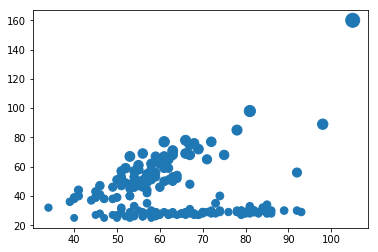

In [5]:
plt.scatter(df.b1,df.b2,df.b3)

## Call DBSCAN method passing epsilon and min sample as argument to form a cluster

In [6]:
model = DBSCAN(eps = 6.5 , min_samples=5).fit(df)

## DBSCAN forms cluster automattically, check how many clusters are formed

In [8]:
labels=model.labels_
print(labels)

[ 1  0  0  0  1  0  0  1  0  1 -1 -1  1  1  0  1  2  1  0  0 -1  1  0  0
  1  0 -1  1  1  1  1  0  2  0  1  1 -1  0  2  1  1  1  0  0  0  1  1  2
  1  0  1  0  0  0  0  0  1  1  0  0  1  1  1  2  0  0  0  1  1  0  1 -1
  2  0  0  0  1  1  0  0  1  1  2  0 -1  0  1  1  0  2 -1  0  2 -1  1  0
  2  0  2  0  1  2  0  0  0  0  0  1  0  0  1  1  1  1  0 -1  0  0  0  0
  0  0  1  1  0  0  0  0  0  1  0  0  1  0  0  0 -1  0  1  0  0  0  0  0
  0  1  1  0  0  1  0  0  0  1  1  1  0 -1  1  0  2  1  2  0  1  0  0  0
  2  1  0  0  0  0  0  0  0  1  0  1  0  0  0  0  0  0  2  1  0  0  0  0
  0  2  2  0  0  0]


In [9]:
n_clusters_ = len(set(labels)) - (1 if -1 in labels else 0)
print(n_clusters_)

3


## And check clusters lables

[ 1  0  0  0  1  0  0  1  0  1 -1 -1  1  1  0  1  2  1  0  0 -1  1  0  0
  1  0 -1  1  1  1  1  0  2  0  1  1 -1  0  2  1  1  1  0  0  0  1  1  2
  1  0  1  0  0  0  0  0  1  1  0  0  1  1  1  2  0  0  0  1  1  0  1 -1
  2  0  0  0  1  1  0  0  1  1  2  0 -1  0  1  1  0  2 -1  0  2 -1  1  0
  2  0  2  0  1  2  0  0  0  0  0  1  0  0  1  1  1  1  0 -1  0  0  0  0
  0  0  1  1  0  0  0  0  0  1  0  0  1  0  0  0 -1  0  1  0  0  0  0  0
  0  1  1  0  0  1  0  0  0  1  1  1  0 -1  1  0  2  1  2  0  1  0  0  0
  2  1  0  0  0  0  0  0  0  1  0  1  0  0  0  0  0  0  2  1  0  0  0  0
  0  2  2  0  0  0]


## Create dataframe for each clusters and outlier 

In [10]:
df1 = df[model.labels_ == 0]
df2 = df[model.labels_ == 1]
df3 = df[model.labels_ == 2]
df4 = df[model.labels_ == -1]

## Scatter plot all clusters

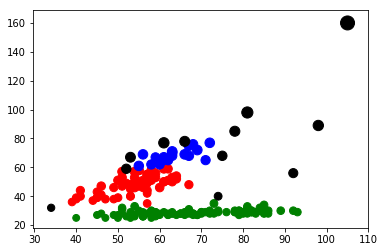

In [12]:
plt.scatter(df1.b1,df1.b2, df1.b3, color='green')
plt.scatter(df2.b1,df2.b2, df2.b3, color='red')
plt.scatter(df3.b1,df3.b2, df3.b3, color='blue')
plt.scatter(df4.b1,df4.b2, df4.b3, color='black')

## End

### Generic python code to choose best value of eps and minimum samples

In [16]:
## FInd optimal value of eps 
for ep in np.arange(1,10,1):
    print("ep - "+str(ep))
    for zeps in np.arange(ep,ep+1,0.1):
        model = DBSCAN(eps = zeps , min_samples=5).fit(df)
        labels=model.labels_
        n_clusters_ = len(set(labels)) - (1 if -1 in labels else 0)
        n_noise_ = list(labels).count(-1) 
        print ("  eps : "+str(zeps)+" No. of cluster : "+str(n_clusters_) + " Outliers : "+str(n_noise_))       
        #print (Counter(model.labels_))

ep - 1
  eps : 1.0 No. of cluster : 0 Outliers : 198
  eps : 1.1 No. of cluster : 0 Outliers : 198
  eps : 1.2000000000000002 No. of cluster : 0 Outliers : 198
  eps : 1.3000000000000003 No. of cluster : 0 Outliers : 198
  eps : 1.4000000000000004 No. of cluster : 0 Outliers : 198
  eps : 1.5000000000000004 No. of cluster : 8 Outliers : 146
  eps : 1.6000000000000005 No. of cluster : 8 Outliers : 146
  eps : 1.7000000000000006 No. of cluster : 8 Outliers : 146
  eps : 1.8000000000000007 No. of cluster : 8 Outliers : 134
  eps : 1.9000000000000008 No. of cluster : 8 Outliers : 134
ep - 2
  eps : 2.0 No. of cluster : 5 Outliers : 115
  eps : 2.1 No. of cluster : 5 Outliers : 115
  eps : 2.2 No. of cluster : 5 Outliers : 115
  eps : 2.3000000000000003 No. of cluster : 4 Outliers : 99
  eps : 2.4000000000000004 No. of cluster : 4 Outliers : 99
  eps : 2.5000000000000004 No. of cluster : 4 Outliers : 85
  eps : 2.6000000000000005 No. of cluster : 4 Outliers : 85
  eps : 2.7000000000000006 N